# 데이터 전처리 및 확인

In [1]:
import pandas as pd

spam_file_path = 'spam_data.csv'  # 스팸 메시지 CSV 파일 경로
normal_file_path = 'message_data.csv'  # 정상 메시지 CSV 파일 경로

spam_df = pd.read_csv(spam_file_path)
normal_df = pd.read_csv(normal_file_path)

df = pd.concat([spam_df, normal_df], ignore_index=True)

df.head()

,label,data
0,0,아현이가 드리는 5장♥받으시고 대박나세요5장 출발 600출 도전!!쿄/드 6 3 7...
1,0,(광고)“「국민」는 더 나은 행복과 희망를 당신에게 선서 할수 있는 보다따뜻한 금융...
2,0,(광고)“「국민」는 당신이 힘들었던 만큼새해엔 더욱 빛나길 바라겠습니다.”새해도 국...
3,0,(광고)“「국민」는 더 나은 행복과 희망를 당신에게 선서 할수 있는 보다따뜻한 금융...
4,0,(광고)“「국민」는 더 나은 행복과 희망를 당신에게 선서 할수 있는 보다따뜻한 금융...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18560 entries, 0 to 18559
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   18560 non-null  int64 
 1   data    18560 non-null  object
dtypes: int64(1), object(1)
memory usage: 290.1+ KB


In [3]:
df = df.dropna()

In [4]:
df['data'] = df['data'].str.lower().str.strip()

# 데이터 분석

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import nltk

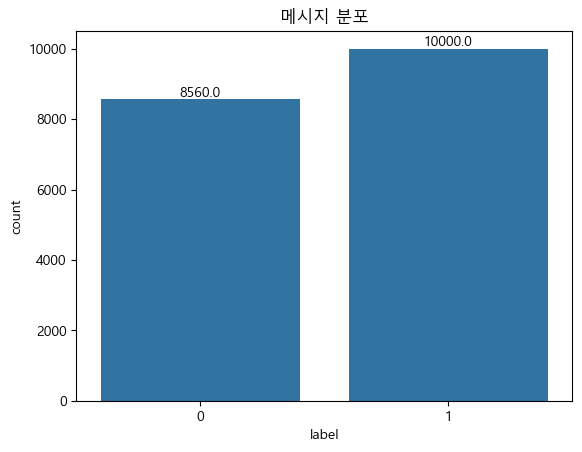

In [6]:
# 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 카운트 플롯 그리기
ax = sns.countplot(x='label', data=df)
plt.title('메시지 분포')

# 각 막대 위에 수치 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

# 모델 설계

In [7]:
# 데이터 준비
X = df['data']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# 모델 선택 및 학습
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [9]:
# 모델 평가
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1712
           1       0.99      1.00      0.99      2000

    accuracy                           0.99      3712
   macro avg       0.99      0.99      0.99      3712
weighted avg       0.99      0.99      0.99      3712

[[1699   13]
 [   8 1992]]
